In [1]:
# Computations
import numpy as np
import pandas as pd
from scipy.stats import norm
import pickle

# sklearn
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor,\
                             BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

## Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex, clear_output

## progressbar
import progressbar

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px

## seaborn
import seaborn as sns

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.font_manager import FontProperties
import matplotlib.colors as mcolors
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<a href="https://hatefdastour.github.io/">Home</a> / 
<a href="https://hatefdastour.github.io/portfolio/real_estate/">Real Estate</a>
</div>

## King County House Sales

* [**Preprocessing**](https://hatefdastour.github.io/portfolio/real_estate/King_County_House_Sales_Preprocessing.html)
* [**Exploratory Data Analysis**](https://hatefdastour.github.io/portfolio/real_estate/King_County_House_Sales_EDA.html)
* [<font color='Green'><b>Modeling: Stacked Modeling</b></font>](https://hatefdastour.github.io/portfolio/real_estate/King_County_House_Sales_Stacked_Modeling.html)

<div class="alert alert-block alert-info"><font size="+2.5"><b>King County House Sales</b></font> </div>


In this study, we analyze and create statistical models using a dataset from [Kaggle.com](https://www.kaggle.com/shivachandel/kc-house-data). This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


### Data Description

Online property companies offer valuations of houses using machine learning techniques. This report aims to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle*. This data was published/released under CC0*: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. The dataset consisted of 21 variables and 21613 observations.

### Data Columns
Attribute Information (in order):
    
| Attribute | Information | Attribute | Information |
|-------------|------------------------------------|---------------|----------------------------------------------------------------|
| id | Identification number of the house | grade | Grade given to the house |
| date | Date of the acquired information | sqft_above | The square footage of the up part of the house |
| price | Price of the house | sqft_basement | The square footage of the basement |
| bedrooms | The number of bedrooms in a house | yr_built | Built year |
| bathrooms | The number of bathrooms in a house | yr_renovated | The last renovation year |
| sqft_living | Square footage of the living area | zipcode | Zipcode |
| sqft_lot | Square footage of the lot area | lat | Latitude of the house |
| floors | The number of floors in the house | long | Longitude of the house |
| waterfront | If it has waterfront | sqft_living15 | The square footage of the living area of the 15 nearest houses |
| view | If it has view | sqft_lot15 | The square footage of the lot area of the 15 nearest houses |
| condition | Condition of the house |  |  |

Creating a dictionary for later analysis:

In [2]:
Path = 'KCData/kc_house_data.csv'

def Header(Text, L = 100, C = 'Blue', T = 'White'):
    BACK = {'Black': Back.BLACK, 'Red':Back.RED, 'Green':Back.GREEN, 'Yellow': Back.YELLOW, 'Blue': Back.BLUE,
         'Magenta':Back.MAGENTA, 'Cyan': Back.CYAN}
    FORE = {'Black': Fore.BLACK, 'Red':Fore.RED, 'Green':Fore.GREEN, 'Yellow':Fore.YELLOW, 'Blue':Fore.BLUE,
         'Magenta':Fore.MAGENTA, 'Cyan':Fore.CYAN, 'White': Fore.WHITE}
    print(BACK[C] + FORE[T] + Style.NORMAL + Text + Style.RESET_ALL + ' ' + FORE[C] +
          Style.NORMAL +  (L- len(Text) - 1)*'=' + Style.RESET_ALL)
    
def Line(L=100, C = 'Blue'):
    FORE = {'Black': Fore.BLACK, 'Red':Fore.RED, 'Green':Fore.GREEN, 'Yellow':Fore.YELLOW, 'Blue':Fore.BLUE,
         'Magenta':Fore.MAGENTA, 'Cyan':Fore.CYAN, 'White': Fore.WHITE}
    print(FORE[C] + Style.NORMAL + L*'=' + Style.RESET_ALL)

def Search_List(Key, List): return [s for s in List if Key in s]

Data = pd.read_csv(Path.split(".")[0]+'_Mod.csv')
Header('King County House Sales Dataset:')
display(Data.head())
display(pd.DataFrame({'Number of Instances': [Data.shape[0]], 'Number of Attributes': [Data.shape[1]]}).style.hide_index())

# Dictionaries
with open(Path.split(".")[0] + '_Feat_Dict.pkl', 'rb') as fp:
    Feat_Dict = pickle.load(fp)

King County House Sales Dataset: ===================================================================


,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2015,180000.0,2,1.00,770,10000,1.0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,2014,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,2015,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Number of Instances,Number of Attributes
21613,22


<div class="alert alert-block alert-danger">
<font size="+2"><b>
Modeling: Stacked Modeling
</b></font>
</div>

In [3]:
df = Data.drop(columns = ['id','date','lat','long'])

# Price in Million
df['price'] = df['price']/(1e6)
Target = 'price'
df.head()

X = df.drop(columns = [Target])
y = df[Target]

Let's look at the variance of the features.

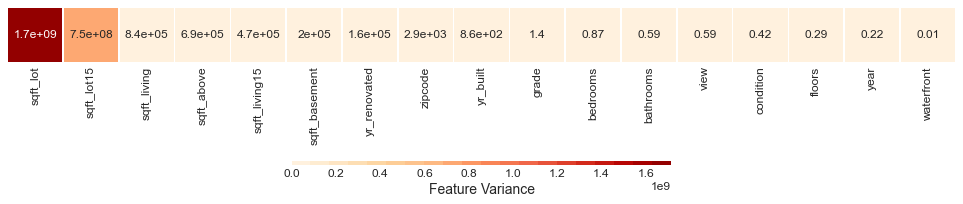

In [4]:
fig, ax = plt.subplots(figsize=(17,12))
Temp = X.var().sort_values(ascending = False).to_frame(name= 'Variance').round(2).T
_ = sns.heatmap(Temp, ax=ax, annot=True, square=True,  cmap =sns.color_palette("OrRd", 20),
                  linewidths = 0.8, vmin=0, vmax=Temp.max(axis =1)[0],  annot_kws={"size": 12},
                  cbar_kws={'label': 'Feature Variance', "aspect":80, "shrink": .4, "orientation": "horizontal"})
_ = ax.set_yticklabels('')

High variance for some features can have a negative impact on our modeling process. For this reason, we would like to standardize features by removing the mean and scaling to unit variance. For this reason, we take a unique approach in preparing the data for end-to-end modeling. In doing so, we can separate numeric and categorical features and treat each group separately.

In [5]:
Obj_List = ['floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'year', 'yr_renovated',  'yr_built']
X[Obj_List] = X[Obj_List].astype(str)

def dtypes_group(Inp):
    Temp = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = pd.DataFrame(index =Temp['Data Type'].unique(), columns = ['Features','Count'])
    for c in Temp['Data Type'].unique():
        Out.loc[Out.index == c, 'Features'] = [Temp.loc[Temp['Data Type'] == c].index.tolist()]
        Out.loc[Out.index == c, 'Count'] = len(Temp.loc[Temp['Data Type'] == c].index.tolist())
    Out.index.name = 'Data Type'
    Out = Out.reset_index(drop = False)
    Out['Data Type'] = Out['Data Type'].astype(str)
    return Out

def dtype_sep(Inp):
    Temp = Inp.dtypes.reset_index(drop = False)
    Temp.columns = ['Features', 'Data Type']
    Temp['Data Type'] = Temp['Data Type'].astype(str)
    # Numeric_Columns
    Numeric_Columns = Temp.loc[Temp['Data Type'].isin(['int64', 'int32', 'float64', 'float32']),'Features'].tolist()
    # Categorical_Columns
    Categorical_Columns = Temp.loc[Temp['Data Type'] == 'object','Features'].tolist()
    return Numeric_Columns, Categorical_Columns

Numeric_Columns, Categorical_Columns = dtype_sep(X)
display(dtypes_group(X).style.hide_index())

Data Type,Features,Count
int64,"['sqft_lot15', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_basement']",6
float64,"['bathrooms', 'sqft_above']",2
object,"['zipcode', 'yr_renovated', 'yr_built', 'year', 'view', 'waterfront', 'floors', 'grade', 'condition']",9


A preprocessor can be considered as follows,

In [6]:
preprocessor = make_column_transformer((StandardScaler(),  tuple(Numeric_Columns)),
                                       (OneHotEncoder(handle_unknown='ignore') , tuple(Categorical_Columns)))

Moreover, to analyze the output of each model, we can define the following functions.

In [7]:
def ScoreTable(reg, RegName, X = X, y = y):
    score = cross_validate(reg, X, y, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error'],
                       return_train_score = True, n_jobs=-1, verbose=0)
    score['test_neg_mean_absolute_error'] = -score['test_neg_mean_absolute_error']
    score['train_neg_mean_absolute_error'] = -score['train_neg_mean_absolute_error']

    Scores = pd.DataFrame(score).mean(axis = 0).map(lambda x: ('%.2f' % x)) + ' ± ' + \
            pd.DataFrame(score).std(axis = 0).map(lambda x: ('%.2e' % x))
    Scores = Scores.to_frame(RegName)
    Temp = [x.replace('_',' ').title().replace('Train','Train:').replace('Test','Test:').replace('Neg','')\
            for x in Scores.index]
    Scores.index = Temp
    return score, Scores

def plot_regression_results(reg, RegName, X=X, y=y):
    y_pred = cross_val_predict(reg, X, y, n_jobs=-1, verbose=0)
    fig, ax = plt.subplots(figsize=(6,6))
    _ = ax.scatter(y, y_pred, facecolors='SkyBlue', edgecolors='MidnightBlue', alpha = 0.8)
    Temp = np.ceil(np.stack((y.values,y_pred), axis = 0).max())
    _ = ax.set_xlim(left = -1e-3, right = Temp)
    _ = ax.set_ylim(bottom = -1e-3, top = Temp)
    del Temp
    _ = ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], '--r', linewidth=2)
    _ = ax.set_xlabel('Measured price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_ylabel('Predicted price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_title(RegName, fontsize = 18)
    _ = ax.set(aspect='equal')

## Regressors

In this section, we test a number of efficient scikit-learn regressors. Then from those that have performed well, a stacked model can be formed. In particular, we use the following models:

| Regressor                   | Link                                                                                                                                            |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| Bagging Regressorr          | [sklearn.ensemble.BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)                   |
| Decision Tree Regressor     | [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)                 |
| Gradient Boosting Regressor | [sklearn.ensemble.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) |
| MLP Regressor               | [sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)               |

|=========================================================================|100%


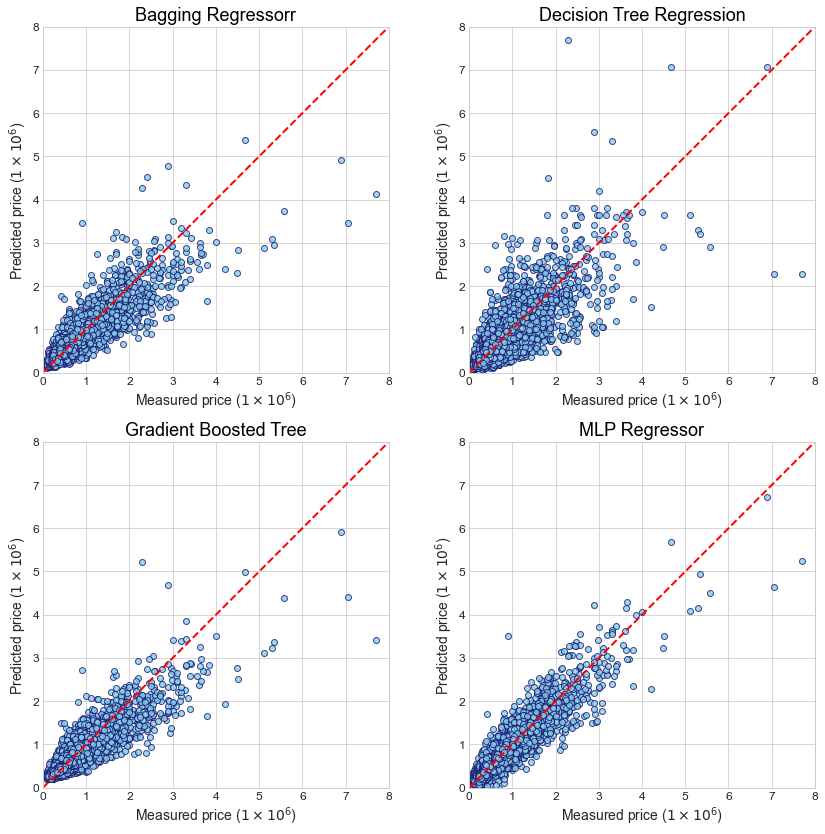

In [8]:
Regressors = {'Bagging Regressorr': BaggingRegressor(),
              'Decision Tree Regression': DecisionTreeRegressor(),
             'Gradient Boosted Tree': GradientBoostingRegressor(),
              'MLP Regressor': MLPRegressor()}

TestR2 = {}
Threshold = .8
flag = True
RegList = list(Regressors.keys())
N = len(RegList)

# Plot
rows = int(np.ceil(N/2))
fig, axes = plt.subplots(nrows= rows, ncols=2, figsize=(14, rows*7))
axes = axes.ravel()
if len(axes)>N:
    _ = fig.delaxes(axes[-1])
        
# Progressbar
Progress_Bar = progressbar.ProgressBar(maxval = N, widgets=[progressbar.Bar('=', '|', '|'), progressbar.Percentage()])
Progress_Bar.start()

for Counter in range(N):
    #
    Progress_Bar.update(Counter)
    RegName = RegList[Counter]
    reg = make_pipeline(preprocessor, Regressors[RegName])
    _ = reg.fit(X, y)
    score, Temp = ScoreTable(reg, RegName)
    if flag:
        Scores = Temp.copy()
    else:
        Scores = pd.concat([Scores,Temp], axis = 1)
    flag = False
    #
    if score['test_r2'].mean() >= Threshold:
        TestR2[RegName] = score['test_r2'].mean()
    
    ax = axes[Counter]
    _ = ax.set(aspect='equal')
    y_pred = cross_val_predict(reg, X, y, n_jobs=-1, verbose=0)
    _ = ax.scatter(y, y_pred, facecolors='SkyBlue', edgecolors='MidnightBlue', alpha = 0.8)
    Temp = np.ceil(np.stack((y.values,y_pred), axis = 0).max())
    _ = ax.set_xlim(left = -1e-3, right = Temp)
    _ = ax.set_ylim(bottom = -1e-3, top = Temp)
    del Temp
    _ = ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], '--r', linewidth=2)
    _ = ax.set_xlabel('Measured price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_ylabel('Predicted price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_title(RegName, fontsize = 18)
    _ = ax.set_aspect(1)
    
Progress_Bar.finish()
del RegList, ax, axes

Moreover, the following table highlights the performance of the regressors.

In [9]:
display(Scores)

,Bagging Regressorr,Decision Tree Regression,Gradient Boosted Tree,MLP Regressor
Fit Time,13.95 ± 1.69e-01,2.03 ± 6.21e-02,2.63 ± 8.79e-03,4.04 ± 5.97e-01
Score Time,0.03 ± 3.05e-03,0.02 ± 2.80e-03,0.02 ± 8.36e-04,0.02 ± 8.37e-04
Test: R2,0.80 ± 7.54e-03,0.66 ± 2.76e-02,0.80 ± 1.11e-02,0.86 ± 9.50e-03
Train: R2,0.97 ± 1.39e-03,1.00 ± 1.85e-05,0.84 ± 2.92e-03,0.98 ± 1.60e-03
Test: Mean Absolute Error,0.09 ± 4.31e-03,0.12 ± 3.93e-03,0.11 ± 4.00e-03,0.09 ± 2.29e-03
Train: Mean Absolute Error,0.04 ± 3.18e-04,0.00 ± 3.05e-05,0.10 ± 1.03e-03,0.04 ± 1.53e-03
Test: Mean Squared Error,-0.03 ± 2.76e-03,-0.04 ± 3.12e-03,-0.03 ± 3.11e-03,-0.02 ± 1.81e-03
Train: Mean Squared Error,-0.00 ± 1.61e-04,-0.00 ± 2.28e-06,-0.02 ± 5.59e-04,-0.00 ± 2.73e-04


## Final Stacked Model

Now, we can define a stacked regressor model that uses a class of estimators and a final estimator, in our case is Random Forest Regressor. The final model, ideally, should perform better than the individual models.


StackingRegressor(estimators=[('Bagging Regressorr',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('standardscaler',
                                                                                 StandardScaler(),
                                                                                 ('bedrooms',
                                                                                  'bathrooms',
                                                                                  'sqft_living',
                                                                                  'sqft_lot',
                                                                                  'sqft_above',
                                                                                  'sqft_basement',
                                                                                  'sqft_living15',
                                                                                  'sqft_lot15')),
                                                                                ('onehotencoder',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ('year',
                                                                                  'floors',
                                                                                  'waterfront',
                                                                                  'view',
                                                                                  'condition',
                                                                                  'grade',
                                                                                  'yr_built',
                                                                                  'yr_renovated',
                                                                                  'zipcode'))])),
                                               ('baggingregressor',
                                                BaggingRegressor())]))],
                  final_estimator=MLPRegressor())

,Stacked
Fit Time,63.64 ± 8.15e-01
Score Time,0.03 ± 8.95e-04
Test: R2,0.80 ± 1.01e-02
Train: R2,0.96 ± 1.81e-03
Test: Mean Absolute Error,0.09 ± 4.45e-03
Train: Mean Absolute Error,0.04 ± 1.56e-03
Test: Mean Squared Error,-0.03 ± 3.42e-03
Train: Mean Squared Error,-0.00 ± 2.55e-04


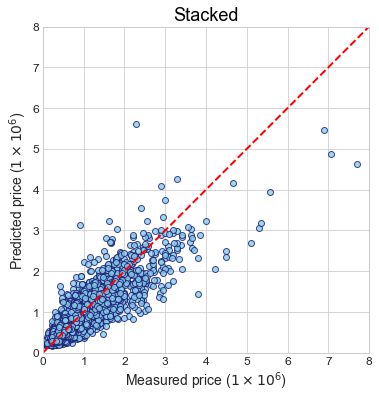

In [10]:
Estimators = []
Final_Est = np.array(list(TestR2.values()))
Final_Est = np.where (Final_Est == Final_Est.max())[0][0]
Final_Est = list(TestR2.keys())[Final_Est]
Temp = TestR2.copy()
_ = Temp.pop(Final_Est)
Temp = Temp.keys()
for RegName in Temp:
    reg = make_pipeline(preprocessor, Regressors[RegName])
    Estimators.append((RegName, reg))
    
del Temp

RegName = 'Stacked'
stacked = StackingRegressor(estimators = Estimators, final_estimator = Regressors[Final_Est])
display(stacked)
_ = stacked.fit(X, y)
#
_, Scores = ScoreTable(stacked, RegName)
display(Scores)
plot_regression_results(stacked, RegName)

We can save the stacked model to disk using
```Python
filename = Path.split('/')[0] + '/' + RegName + 'Regressor.model'
pickle.dump(stacked, open(filename, 'wb'))
```
Moreover, to load this model (for later usage), we have
```Python
loaded_model = pickle.load(open(filename, 'rb'))
print(result)
```

# Predictions

It appears that the performance of MLP Regressor is better than the stacked regressor in this Example. However, for the sake of demonstration, we present the predictions from the stacked regressor only.

In addition, we have a model that can predict the price of a house for given input values. For example,

In [11]:
Example = X.iloc[0:1,:]
Example[Numeric_Columns]+= 0.1*Example[Numeric_Columns]
display(Example)
#----------------------------------------------------------------------
# Predictions
Price = stacked.predict(Example)
print('Estimated Price =', round(np.exp(Price[0])*(1e6), 2))

,year,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014,3.3,1.1,1298.0,6215.0,1.0,0,0,3,7,1298.0,0.0,1955,0,98178,1474.0,6215.0


Estimated Price = 1279314.48


***

# Refrences
1. Breiman, L., 1996. Bagging predictors. Machine learning, 24(2), pp.123-140.
1. sklearn ensemble BaggingRegressor, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
1. Decision tree learning, https://en.wikipedia.org/wiki/Decision_tree_learning
1. James, G., Witten, D., Hastie, T. and Tibshirani, R., 2013. An introduction to statistical learning (Vol. 112, pp. 3-7). New York: springer.
1. sklearn tree DecisionTreeRegressor, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
1. sklearn ensemble StackingRegressor, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
***